## Part 1: Data Exploration

In [1]:
import pandas as pd
import gzip
import json

In [2]:
#Digital Music Dataset
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

music_df = getDF('data/Digital_Music_5.json.gz')

music_df['style'] = music_df['style'].apply(lambda x: x.get('Format:').strip() if isinstance(x, dict) else None)
music_df['style'] = music_df['style'].fillna("N/A")


In [3]:
print(music_df.head())

#print(music_df.keys())

#print(music_df['style'])
print()
print("Number of Unique Music Tracks: ", music_df['asin'].nunique())
print()
print("Different styles of Music Mediums: ", music_df['style'].unique())
print()
print("Counts of purchases by Music Medium: ", music_df['style'].value_counts())
print()


   overall vote  verified   reviewTime      reviewerID        asin     style  \
0      5.0    3      True   06 3, 2013  A2TYZ821XXK2YZ  3426958910  Audio CD   
1      5.0  NaN      True  10 11, 2014  A3OFSREZADFUDY  3426958910  Audio CD   
2      5.0  NaN      True  02 11, 2014  A2VAMODP8M77NG  3426958910  Audio CD   
3      4.0    3     False   12 7, 2013   AAKSLZ9IDTEH0  3426958910  Audio CD   
4      5.0  NaN      True  06 12, 2016  A3OH43OZJLKI09  5557706259  Audio CD   

        reviewerName                                         reviewText  \
0            Garrett  This is awesome to listen to, A must-have for ...   
1                 Ad                                               bien   
2             JTGabq  It was great to hear the old stuff again and I...   
3  john F&#039;n doe  well best of's are a bit poison normally but t...   
4  melinda a goodman  What can I say? This is Casting Crowns!!!This ...   

                                             summary  unixReviewTime

In [4]:
music_df.info()
print()
#music_df.describe()
print()
music_df['style'].isna().sum()
print()
print(music_df['overall'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 169781 entries, 0 to 169780
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         169781 non-null  float64
 1   vote            7611 non-null    object 
 2   verified        169781 non-null  bool   
 3   reviewTime      169781 non-null  object 
 4   reviewerID      169781 non-null  object 
 5   asin            169781 non-null  object 
 6   style           169781 non-null  object 
 7   reviewerName    169776 non-null  object 
 8   reviewText      169623 non-null  object 
 9   summary         169745 non-null  object 
 10  unixReviewTime  169781 non-null  int64  
 11  image           182 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 15.7+ MB



overall
5.0    135842
4.0     23143
3.0      6792
1.0      2192
2.0      1812
Name: count, dtype: int64


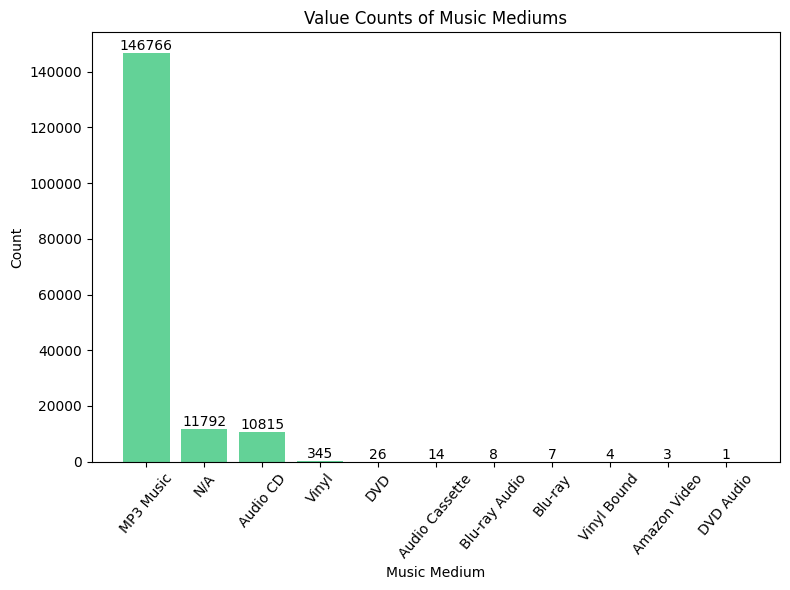

In [ ]:
import matplotlib.pyplot as plt

counts = music_df["style"].value_counts(dropna=False)
fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(counts.index, counts.values, color="#63d297")

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        str(int(height)),
        ha='center', va='bottom', fontsize=10
    )

ax.set_title("Value Counts of Music Mediums")
ax.set_xlabel("Music Medium")
ax.set_ylabel("Count")
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()


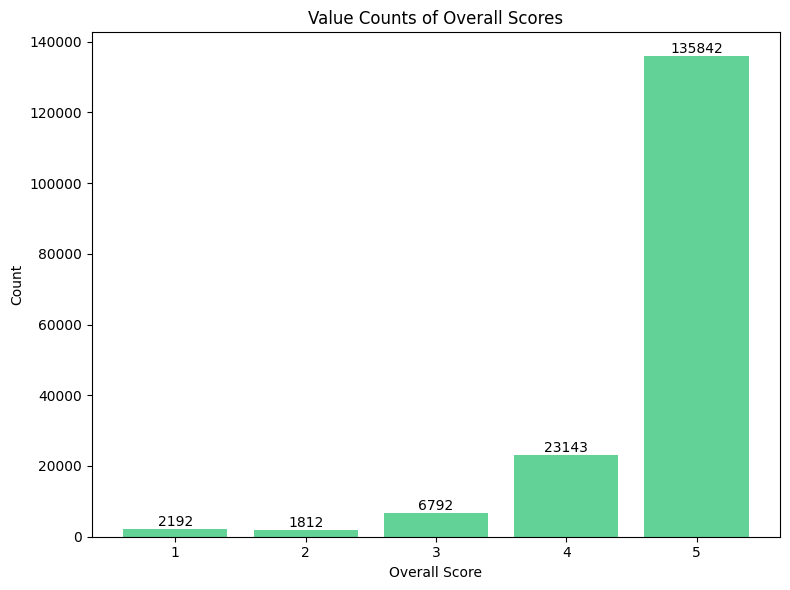

In [ ]:
overall_counts = music_df["overall"].value_counts(dropna=False)

fig2, ax2 = plt.subplots(figsize=(8,6))
overall_bars = ax2.bar(overall_counts.index, overall_counts.values, color="#63d297")

# Add labels on top of bars
for bar in overall_bars:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width()/2,
        height,
        str(int(height)),
        ha='center', va='bottom', fontsize=10
    )

ax2.set_title("Value Counts of Overall Scores")
ax2.set_xlabel("Overall Score")
ax2.set_ylabel("Count")
plt.tight_layout()
plt.show()

In [10]:
from datetime import datetime
# Convert to datetime
earliest_dt = datetime.fromtimestamp(music_df['unixReviewTime'].min())
latest_dt = datetime.fromtimestamp(music_df['unixReviewTime'].max())

print("Earliest Review: ", earliest_dt)
print("Latest Review: " , latest_dt)

Earliest Review:  1998-07-08 20:00:00
Latest Review:  2018-09-25 20:00:00
